In [1]:
import numpy as np
from sklearn.decomposition import PCA
import cv2
import glob

In [2]:
img_files = glob.glob('dataset/*')

In [6]:
gray_images = []
labels = []
for file in img_files:
    img = cv2.imread(file)
    img = cv2.resize(img,(128,128),interpolation=cv2.INTER_AREA) #None,fx=0.5,fy=0.5
    flat_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).flatten()
    gray_images.append(flat_img)

In [7]:
n_features = np.shape(gray_images[0])[0]
#print(n_features)
std_dev = np.zeros(np.shape(gray_images))
print(std_dev.shape)
gray_images = np.asarray(gray_images)
for i in range(n_features):
     std_dev[:,i] =  (gray_images[:,i] - np.mean(gray_images[:,i]))/gray_images[:,i].std()

(200, 16384)


In [8]:
#print(np.shape(gray_images))
# Covariance
#np.set_printoptions(precision=3)
cov = np.cov(std_dev.T)# Eigen Values

In [9]:
from scipy.linalg import eigh
EigVal,EigVec = eigh(cov)
#EigVal,EigVec = np.linalg.eig(cov)
print("Eigenvalues:\n\n", EigVal,"\n")

Eigenvalues:

 [-2.00026385e-12 -1.90450848e-12 -1.21097829e-12 ...  1.23350809e+03
  2.51279100e+03  4.42204920e+03] 



In [16]:
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]#Projecting data on Eigen vector directions resulting to Principal Components 
PC = np.matmul(std_dev, EigVec)   #cross product

24 0.8044871428717494


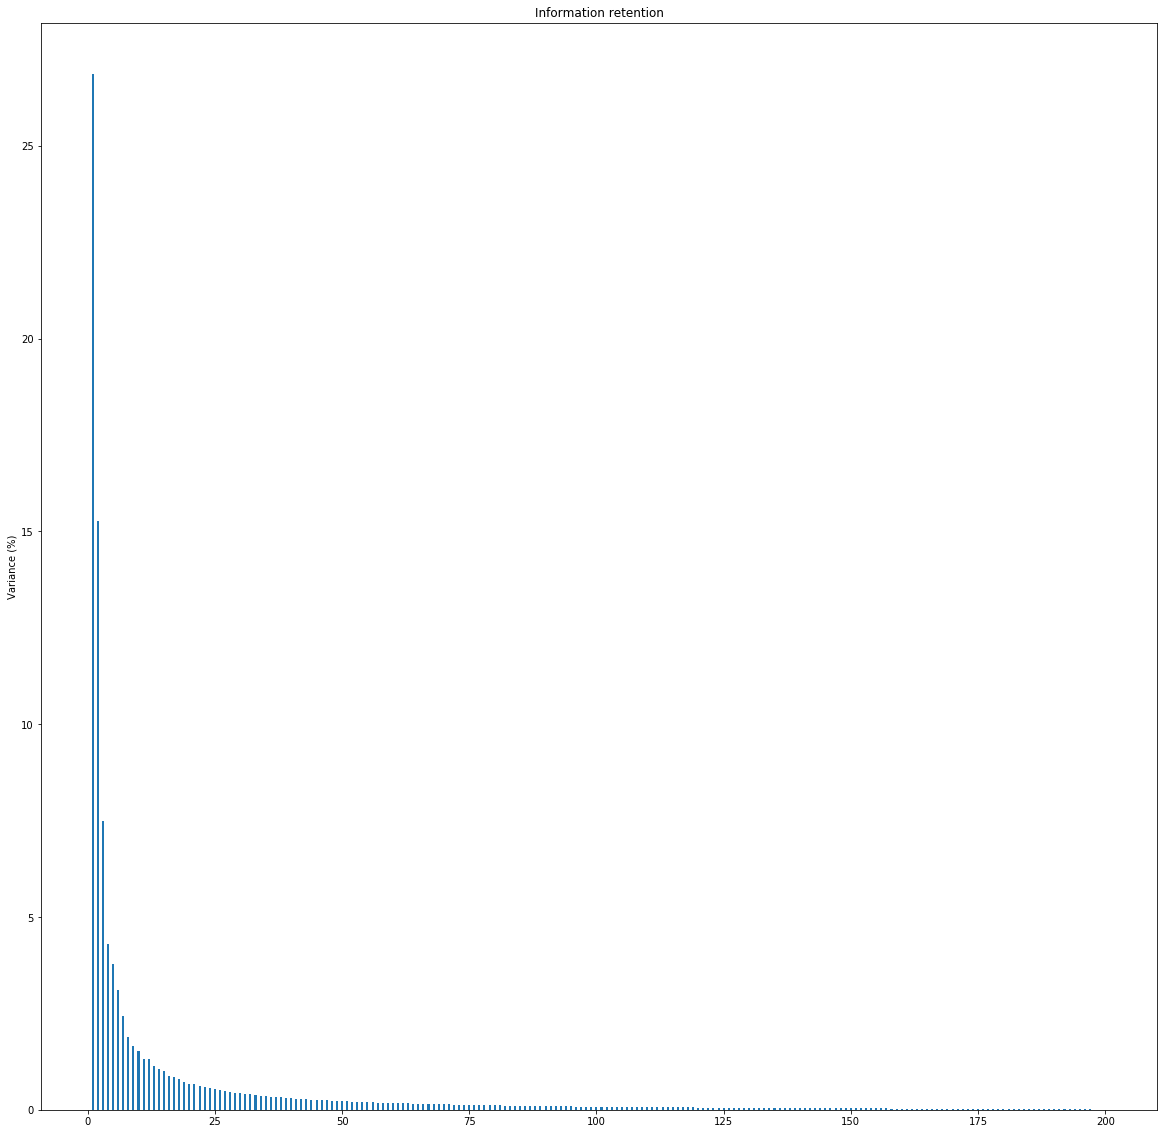

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
percent=0
count=0
thresh = 0.8
for i in EigVal:
    percent+= i/sum(EigVal)
    count+=1
    if percent > thresh:
        break;
print(count, percent)
plt.figure(figsize=(20,20))
plt.bar([i+1 for i in range(200)],EigVal[:200]/sum(EigVal)*100,align='center',width=0.4) #tick_label = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
plt.ylabel('Variance (%)')
plt.title('Information retention');

In [14]:
max(PC[0])

18252.37500849587

In [42]:
pca = PCA() #n_components = 0.9999
X = gray_images[:,0:100]
print(np.shape(gray_images))
output_pca = pca.fit_transform(gray_images)
print(output_pca[:,0])  ## (n_sample, n_components), EigVec
print(pca.components_[:,0])  ## (n_components, n_features)
print(pca.explained_variance_.shape)
#approx_imgs = pca.inverse_transform(output_pca)
#print(np.shape(approx_imgs))
#print(max(approx_imgs[0]))

(200, 65536)
[ -5367.48722935   1050.92058785  -1514.70338965   5772.71027852
   3727.87301709  -3432.61868293    765.02855446  -5157.12128901
    359.19493802    980.09990232   3203.28629055  -7254.05740819
   6034.15933224   4800.58033949   -775.51571175   2427.03116347
   5693.19230513   4435.23156282  -5558.91730993   5803.20389478
    500.00399702   4486.44645281  -5329.70875086  -6663.93666518
   5170.45471457  -1129.53766579   2131.38310156  10856.38417742
  -6755.84873435  -1402.62413     -5806.85198332    147.66038464
  12305.67123704   5814.06816562  -1886.79972864    132.3552855
   7522.65130831  -3284.46961947   1868.87419697   8468.08400347
   9018.89382506  -1242.82504895   1828.74649609   3130.58663501
  -9162.06035615   -252.27251372  10405.59439387  -4921.93378741
   5937.98403081  -4006.25604386  -3128.89078834  11107.01384671
  -5906.82651058   3955.72810437    597.09787622   9680.8133863
   2441.15289498  10238.65246842   7032.1181642    8749.24178682
   7008.169227

(200, 4000)


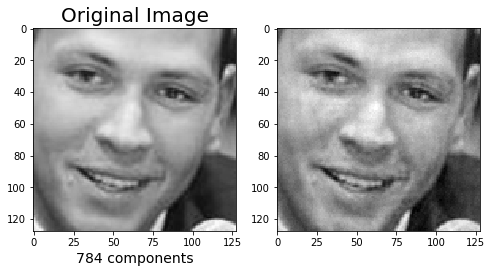

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(gray_images[0].reshape(128,128),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
PC_img = np.matmul(gray_images, EigVec[:, :4000])
print(PC_img.shape)
reconstructed_img = np.matmul(PC_img, EigVec[:, :4000].T)
plt.subplot(1, 2, 2);
plt.imshow(reconstructed_img[0].reshape(128, 128),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));

In [29]:
from sklearn.metrics import mean_squared_error

#for img in range(len(approx_imgs)):
#    approx_imgs[img] = np.interp(approx_imgs[img], (approx_imgs[img].min(), approx_imgs[img].max()), (0, 255))
#approx_imgs = approx_imgs.astype(np.uint8)
mean_squared_error(gray_images, reconstructed_img)

40.93832602174733

In [ ]:
pca_comp = [0.99 0.95 0.90 0.85 0.80 0.75 0.70 0.60 0.50]
n_comp = []
mse = []
for num in pca_comp:
    pca = PCA(n_components = 0.90)
    output_pca = pca.fit_transform(gray_images)
    n_comp.append(np.shape(output_pca)[1])
    approx_imgs = pca.inverse_transform(output_pca)
    for img in range(len(approx_imgs)):
        approx_imgs[img] = np.interp(approx_imgs[img], (approx_imgs[img].min(), approx_imgs[img].max()), (0, 255))
    approx_imgs = approx_imgs.astype(np.uint8)
    mean_squared_error(gray_images, approx_imgs)